# Explore and Preprocess Depmap Data for Use in Model Training

In [1]:
import os
import re
import gc

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [2]:
top_dir = '../'
inp_dir = os.path.join(top_dir, 'data/raw/depmap')
os.listdir(inp_dir)

['OmicsSomaticMutationsMatrixDamaging.csv',
 'OmicsExpressionProteinCodingGenesTPMLogp1.csv',
 'CRISPRGeneDependency.csv',
 'CRISPRGeneEffect.csv',
 'OmicsCNGene.csv',
 'README.txt']

In [3]:
output_dir = os.path.join(top_dir, 'data/preproc/depmap_all_dtypes_processed')
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## RNA Expression Data

In [4]:
RNAExpression_file = os.path.join(inp_dir, 'OmicsExpressionProteinCodingGenesTPMLogp1.csv')
RNAExpression = pd.read_csv(RNAExpression_file, index_col=0)

In [5]:
RNAExpression.head()

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,H3C2 (8358),H3C3 (8352),AC098582.1 (8916),DUS4L-BCAP29 (115253422),C8orf44-SGK3 (100533105),ELOA3B (728929),NPBWR1 (2831),ELOA3D (100506888),ELOA3 (162699),CDR1 (1038)
ACH-001113,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,4.739848,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.0,0.275007,0.0,0.0,0.000000
ACH-001289,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,3.481557,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.0,0.014355,0.0,0.0,0.000000
ACH-001339,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,3.273516,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.0,0.084064,0.0,0.0,0.042644
ACH-001538,5.085340,0.000000,7.154211,2.545968,3.084064,0.000000,5.868390,6.165309,4.489928,3.956986,...,0.214125,0.632268,0.298658,1.641546,0.443607,0.0,0.028569,0.0,0.0,0.000000
ACH-000242,6.729417,0.000000,6.537917,2.456806,3.867896,0.799087,7.208478,5.570159,7.127117,4.568032,...,1.117695,2.358959,0.084064,1.910733,0.000000,0.0,0.464668,0.0,0.0,0.000000


In [6]:
# rename columns
RNAExpression_new_columns = [re.sub(' \([A-z0-9]+\)', '', x) for x in  RNAExpression.columns.values.astype('str')]
assert sum(pd.Series(RNAExpression_new_columns).duplicated().values) == 0
RNAExpression.columns = RNAExpression_new_columns

In [7]:
RNAExpression.columns

Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'H3C2', 'H3C3', 'AC098582.1', 'DUS4L-BCAP29', 'C8orf44-SGK3', 'ELOA3B',
       'NPBWR1', 'ELOA3D', 'ELOA3', 'CDR1'],
      dtype='object', length=19193)

In [8]:
RNAExpression.shape

(1479, 19193)

In [9]:
np.any(RNAExpression.values.sum(axis=0) == 0)

False

In [10]:
np.any(RNAExpression.values.sum(axis=1) == 0)

False

## Copy Number Varation Data

In [11]:
CNAGene_file = os.path.join(inp_dir, 'OmicsCNGene.csv')
CNAGene = pd.read_csv(CNAGene_file, index_col=0)
CNAGene.head()

,FAM87B (400728),LINC01128 (643837),AL669831.7 (107984850),FAM41C (284593),LINC02593 (100130417),SAMD11 (148398),NOC2L (26155),KLHL17 (339451),PLEKHN1 (84069),PERM1 (84808),...,TXLNGY (246126),KDM5D (8284),AC010889.2 (105377224),TTTY10 (246119),EIF1AY (9086),RPS4Y2 (140032),PRORY (100533178),TTTY13 (83868),TTTY5 (83863),DAZ3 (57054)
ACH-000431,0.938003,0.938003,0.938003,0.938003,0.938003,0.938003,0.938003,0.938003,0.938003,0.938003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-000358,0.642543,0.642543,0.642543,0.642543,0.642543,0.642543,0.642543,0.642543,0.642543,0.642543,...,0.666204,0.666204,0.666204,0.666204,0.666204,0.666204,0.666204,0.666204,0.666204,0.666204
ACH-000207,0.932707,0.932707,0.932707,0.932707,0.932707,0.932707,0.932707,0.932707,0.932707,0.932707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-002486,1.125419,1.125419,1.125419,1.125419,1.125419,1.125419,1.125419,1.125419,1.125419,1.125419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-001705,0.829411,0.829411,0.829411,0.829411,0.829411,0.829411,0.829411,0.829411,0.829411,0.829411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# rename columns
CNAGene_new_columns = [re.sub(' \([A-z0-9]+\)', '', x) for x in  CNAGene.columns.values.astype('str')]
assert sum(pd.Series(CNAGene_new_columns).duplicated().values) == 0
CNAGene.columns = CNAGene_new_columns

In [13]:
CNAGene.columns

Index(['FAM87B', 'LINC01128', 'AL669831.7', 'FAM41C', 'LINC02593', 'SAMD11',
       'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1',
       ...
       'TXLNGY', 'KDM5D', 'AC010889.2', 'TTTY10', 'EIF1AY', 'RPS4Y2', 'PRORY',
       'TTTY13', 'TTTY5', 'DAZ3'],
      dtype='object', length=24380)

In [14]:
CNAGene.shape

(1750, 24380)

In [15]:
np.any(CNAGene.values.sum(axis=0) == 0)

False

In [16]:
np.any(CNAGene.values.sum(axis=1) == 0)

False

## Somatic Mutation (Damaging)

In [17]:
SNVGene_file = os.path.join(inp_dir, 'OmicsSomaticMutationsMatrixDamaging.csv')
SNVGene = pd.read_csv(SNVGene_file, index_col=0)
SNVGene.head()

,FAM87B (400728),LINC01128 (643837),SAMD11 (148398),NOC2L (26155),KLHL17 (339451),PERM1 (84808),HES4 (57801),ISG15 (9636),AGRN (375790),RNF223 (401934),...,TRMT1P1 (Unknown),SRY (6736),RPS4Y1 (6192),RBMY1A3P (Unknown),CHEK2P1 (Unknown),ARSDP1 (Unknown),ANOS2P (Unknown),TTTY13 (83868),TPTE2P4 (Unknown),PARP4P1 (Unknown)
ACH-000062,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-001691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000956,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# rename columns
SNVGene_new_columns = [re.sub(' \([A-z0-9]+\)', '', x) for x in  SNVGene.columns.values.astype('str')]
assert sum(pd.Series(SNVGene_new_columns).duplicated().values) == 0
SNVGene.columns = SNVGene_new_columns

In [19]:
SNVGene.columns

Index(['FAM87B', 'LINC01128', 'SAMD11', 'NOC2L', 'KLHL17', 'PERM1', 'HES4',
       'ISG15', 'AGRN', 'RNF223',
       ...
       'TRMT1P1', 'SRY', 'RPS4Y1', 'RBMY1A3P', 'CHEK2P1', 'ARSDP1', 'ANOS2P',
       'TTTY13', 'TPTE2P4', 'PARP4P1'],
      dtype='object', length=18748)

In [20]:
SNVGene.shape

(1750, 18748)

In [21]:
np.any(SNVGene.values.sum(axis=0) == 0)

True

In [22]:
np.any(SNVGene.values.sum(axis=1) == 0)

False

In [23]:
SNVGene = SNVGene.iloc[:,SNVGene.values.sum(axis=0) > 0]

In [24]:
SNVGene.shape

(1750, 17779)

In [25]:
np.any(SNVGene.values.sum(axis=0) == SNVGene.shape[1])

False

## CRISPR Gene Effect Data

In [26]:
CRISPRGeneEffect_file = os.path.join(inp_dir, 'CRISPRGeneEffect.csv')
CRISPRGeneEffect = pd.read_csv(CRISPRGeneEffect_file, index_col=0)
CRISPRGeneEffect.head()

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000001,-0.122637,0.025881,0.034217,-0.128082,-0.031285,0.338046,-0.006439,-0.093642,0.189186,0.042783,...,-0.131727,-0.039829,0.179405,0.283552,0.204513,-0.289724,-0.062972,0.074180,0.111244,-0.467908
ACH-000004,0.019756,-0.083640,-0.060118,-0.027417,-0.036116,-0.001056,0.312876,-0.086897,0.204434,0.188715,...,-0.170329,-0.454263,0.194583,0.098989,0.126948,0.032983,-0.410392,0.113156,0.234388,-0.088306
ACH-000005,-0.107208,-0.023211,0.200204,0.116039,-0.172227,-0.071294,0.203270,-0.127806,-0.090981,0.073349,...,-0.301695,-0.454969,-0.061959,-0.036427,0.016602,-0.201273,-0.178877,-0.055349,-0.002161,-0.186842
ACH-000007,-0.031027,-0.137850,0.067704,0.107988,0.007992,0.124945,0.049548,-0.220824,-0.165669,0.230047,...,-0.303390,-0.507272,-0.025400,0.236659,0.072010,-0.100344,-0.462160,-0.001555,-0.325964,-0.486660
ACH-000009,0.008888,-0.146566,0.084471,0.089419,0.065109,0.027841,0.087943,-0.161369,0.041121,0.136621,...,-0.255466,-0.288739,-0.037132,0.261444,-0.062391,-0.112703,-0.598698,0.095877,-0.026742,-0.320759


In [27]:
CRISPRGeneEffect.shape

(1100, 18443)

In [28]:
CRISPRGeneDependency_file = os.path.join(inp_dir, 'CRISPRGeneDependency.csv')
CRISPRGeneDependency = pd.read_csv(CRISPRGeneDependency_file, index_col=0)
CRISPRGeneDependency.head()

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000001,0.063550,0.017803,0.016486,0.066293,0.029758,0.000815,0.023883,0.050448,0.003767,0.015225,...,0.068175,0.032055,0.004142,0.001468,0.003247,0.195908,0.039109,0.011347,0.007978,0.437038
ACH-000004,0.016670,0.044559,0.035885,0.026364,0.028644,0.020426,0.000832,0.045910,0.002606,0.003058,...,0.093742,0.493753,0.002883,0.007575,0.005719,0.014641,0.414198,0.006575,0.001914,0.046494
ACH-000005,0.040757,0.022681,0.005047,0.008861,0.064044,0.031699,0.004941,0.047061,0.036375,0.011763,...,0.152467,0.362731,0.029695,0.024869,0.017247,0.078232,0.067087,0.028369,0.019612,0.070876
ACH-000007,0.018149,0.051901,0.006559,0.004373,0.012135,0.003699,0.007898,0.107051,0.066871,0.001368,...,0.197652,0.550288,0.017119,0.001285,0.006273,0.036344,0.464681,0.013396,0.229044,0.511280
ACH-000009,0.026656,0.115825,0.011635,0.011006,0.014439,0.021746,0.011194,0.130169,0.018793,0.006508,...,0.246275,0.295764,0.042915,0.001720,0.055031,0.087271,0.739790,0.010245,0.038641,0.345928


In [29]:
# rename columns
CRISPRGeneDependency_new_columns = [re.sub(' \([A-z0-9]+\)', '', x) for x in  CRISPRGeneDependency.columns.values.astype('str')]
assert sum(pd.Series(CRISPRGeneDependency_new_columns).duplicated().values) == 0
CRISPRGeneDependency.columns = CRISPRGeneDependency_new_columns

In [30]:
CRISPRGeneDependency.columns

Index(['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A3GALT2', 'A4GALT', 'A4GNT', 'AAAS',
       'AACS', 'AADAC',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=18443)

In [31]:
# rename columns
CRISPRGeneEffect_new_columns = CRISPRGeneDependency_new_columns = [re.sub(' \([A-z0-9]+\)', '', x) for x in  CRISPRGeneEffect.columns.values.astype('str')]
assert sum(pd.Series(CRISPRGeneEffect_new_columns).duplicated().values) == 0
CRISPRGeneEffect.columns = CRISPRGeneEffect_new_columns

In [32]:
CRISPRGeneEffect.columns

Index(['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A3GALT2', 'A4GALT', 'A4GNT', 'AAAS',
       'AACS', 'AADAC',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=18443)

In [33]:
CRISPRGeneEffect_mat = CRISPRGeneEffect.values.astype('float64')
CRISPRGeneDependency_mat = CRISPRGeneDependency.values.astype('float64')

In [34]:
np.any(np.isnan(CRISPRGeneEffect_mat))

True

In [35]:
np.sum(np.isnan(CRISPRGeneEffect_mat))

739493

In [36]:
np.sum(np.isnan(CRISPRGeneEffect_mat))/len(CRISPRGeneEffect_mat.flatten())

0.036451030940539156

In [37]:
np.any(np.isnan(CRISPRGeneDependency_mat))

True

In [38]:
np.sum(np.isnan(CRISPRGeneDependency_mat))

739493

In [39]:
np.sum(np.isnan(CRISPRGeneDependency_mat))/len(CRISPRGeneDependency_mat.flatten())

0.036451030940539156

In [40]:
np.all(np.isnan(CRISPRGeneDependency_mat) == np.isnan(CRISPRGeneEffect_mat))

True

In [41]:
np.any(np.isnan(CRISPRGeneDependency_mat).sum(axis=0) == CRISPRGeneDependency_mat.shape[0])

False

In [42]:
np.any(np.isnan(CRISPRGeneDependency_mat).sum(axis=1) == CRISPRGeneDependency_mat.shape[1])

False

For the sake of getting this done quickly, we'll "pollute" the data with imputed values for NaN values. Only impacts 4% of data

In [43]:
CRISPRGeneEffect_KNN_imputer = KNNImputer(n_neighbors=5)
CRISPRGeneEffect_mat = CRISPRGeneEffect_KNN_imputer.fit_transform(CRISPRGeneEffect_mat)
CRISPRGeneDependency_KNN_imputer = KNNImputer(n_neighbors=5)
CRISPRGeneDependency_mat = CRISPRGeneDependency_KNN_imputer.fit_transform(CRISPRGeneDependency_mat)

In [44]:
CRISPRGeneEffect_mat_flat = CRISPRGeneEffect_mat.flatten()
CRISPRGeneDependency_mat_flat = CRISPRGeneDependency_mat.flatten()

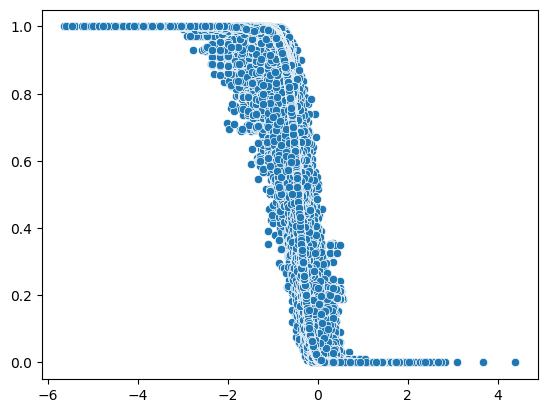

In [45]:
sns.scatterplot(x=CRISPRGeneEffect_mat_flat, y=CRISPRGeneDependency_mat_flat)

In [46]:
CRISPRGeneEffect_imputed = pd.DataFrame(CRISPRGeneEffect_mat, 
                                        index = CRISPRGeneEffect.index, 
                                        columns = CRISPRGeneEffect.columns)

In [47]:
CRISPRGeneDependency_imputed = pd.DataFrame(CRISPRGeneDependency_mat, 
                                        index = CRISPRGeneDependency.index, 
                                        columns = CRISPRGeneDependency.columns)

Overall, it appears that scores below about 0.5 have a roughly 80% "chance" of being essential for the given cell line x deletion combo

## Subset for Final Data to Be Used

### Subset for Common Samples

In [48]:
RNA_samples = RNAExpression.index.values.astype('str')
CNA_samples = CNAGene.index.values.astype('str')
SNV_samples = SNVGene.index.values.astype('str')
CRISPR_samples = CRISPRGeneEffect.index.values.astype('str')
common_samples = np.intersect1d(RNA_samples, CNA_samples)
common_samples = np.intersect1d(common_samples, SNV_samples)
common_samples = np.intersect1d(common_samples, CRISPR_samples)
len(common_samples)

1021

In [49]:
RNAExpression = RNAExpression.loc[common_samples, :]
# CNAGene = CNAGene.loc[common_samples, :]
SNVGene = SNVGene.loc[common_samples, :]
CRISPRGeneDependency_imputed = CRISPRGeneDependency_imputed.loc[common_samples, :]
CRISPRGeneEffect_imputed = CRISPRGeneEffect_imputed.loc[common_samples, :]

### Get Variably Essential Genes for CRISPR

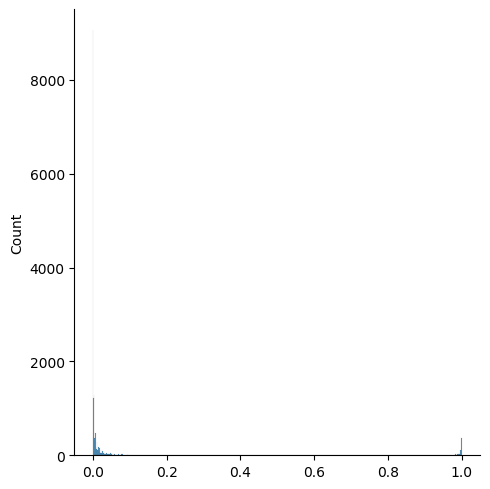

In [50]:
CRISPRGeneDependency_mat_bin = (CRISPRGeneDependency_imputed.values.astype('float64') > 0.5).astype('int32')
prop_essential = CRISPRGeneDependency_mat_bin.sum(axis=0)/CRISPRGeneDependency_mat_bin.shape[0]
sns.displot(prop_essential)

In [51]:
# for simplicity's sake, let's take genes that are essential in 10-90% of cell lines
CRISPR_genes_variable = np.logical_and(prop_essential > 0.10, prop_essential < 0.90)
sum(CRISPR_genes_variable)

1829

### Get CRISPR Genes in Adjacency Matrix

In [52]:
adj_mat_dir = os.path.join(top_dir, 'data/preproc/intact_proc_diffused')
A_df = pd.read_csv(os.path.join(adj_mat_dir, 'A_random_walk_2_step.csv'), index_col=0)

In [53]:
nodes = A_df.index

In [54]:
nodes

Index(['SYNJ1', 'AMPH', 'SH3GL1', 'DNM1', 'FHL2', 'FHL3', 'EPS15', 'MCM7',
       'AR', 'ABI1',
       ...
       'CALM3', 'SFT2D3', 'SLC16A2', 'H19', 'OSBPL7', 'PDE6A', 'SCN9A',
       'SLC38A8', 'MIR146A', 'MIR338'],
      dtype='object', length=15993)

In [55]:
CRISPR_genes_w_ppi = np.in1d(CRISPRGeneEffect_imputed.columns.values.astype('str'), nodes.values.astype('str'))

### Subset CRISPR Genes

In [56]:
CRISPR_genes_keep = CRISPRGeneEffect_imputed.columns.values.astype('str')[np.logical_and(CRISPR_genes_w_ppi, CRISPR_genes_variable)]
CRISPRGeneEffect_proc = CRISPRGeneEffect_imputed.loc[:, CRISPR_genes_keep]
CRISPRGeneDependency_proc = CRISPRGeneDependency_imputed.loc[:, CRISPR_genes_keep]

In [57]:
CRISPRGeneEffect_proc.shape

(1021, 1690)

In [58]:
A_df_subs = A_df.loc[CRISPR_genes_keep, :]

In [59]:
np.sum(A_df_subs.to_numpy().astype('float32').sum(axis=0) == 0.)

47

In [60]:
CRISPR_ppis_keep = A_df_subs.to_numpy().astype('float32').sum(axis=0) != 0
A_df_subs = A_df_subs.iloc[:, CRISPR_ppis_keep]

In [61]:
A_df_subs.shape

(1690, 15946)

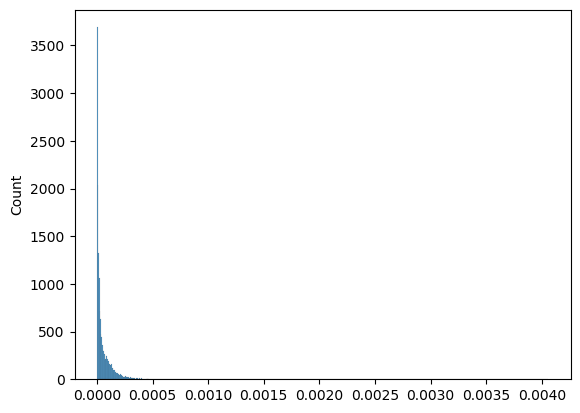

In [62]:
sns.histplot(A_df_subs.to_numpy().astype('float32').sum(axis=0)/A_df_subs.shape[0])

In [63]:
A_df_subs.to_numpy().astype('float32').sum(axis=0).min()

1.4534884e-05

In [64]:
# This is the average probability of going from a CRISPR gene (row) to another gene (column)
np.quantile(A_df_subs.to_numpy().astype('float32').sum(axis=0)/A_df_subs.shape[0], [0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

array([1.12374167e-06, 6.18905733e-06, 2.14217716e-05, 7.63983080e-05,
       2.32859951e-04, 5.33588912e-04])

In [65]:
(A_df_subs.to_numpy().astype('float32') > 0.05).sum()

4498

In [66]:
# This is the average row-wise transition probability
np.quantile(A_df_subs.to_numpy().astype('float32').sum(axis=1)/A_df_subs.shape[1], [0.05, 0.25, 0.5, 0.75, 0.95])

array([6.27111545e-05, 6.27114860e-05, 6.27116533e-05, 6.27118334e-05,
       6.27121190e-05])

### Create Train and Test Indices for Sample x Gene Deletion Pairs

In [67]:
all_pairs = []
for i in range(CRISPRGeneEffect_proc.shape[0]):
    for j in range(CRISPRGeneEffect_proc.shape[1]):
        all_pairs.append([i, j])
all_pairs_arr = np.array(all_pairs)

In [68]:
all_pairs_arr[0:20]

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       [ 0,  3],
       [ 0,  4],
       [ 0,  5],
       [ 0,  6],
       [ 0,  7],
       [ 0,  8],
       [ 0,  9],
       [ 0, 10],
       [ 0, 11],
       [ 0, 12],
       [ 0, 13],
       [ 0, 14],
       [ 0, 15],
       [ 0, 16],
       [ 0, 17],
       [ 0, 18],
       [ 0, 19]])

In [69]:
train_idx, test_idx = train_test_split(all_pairs_arr, test_size=0.25, random_state=42, shuffle=True)

In [70]:
train_idx[0:20]

array([[ 687, 1521],
       [ 644,  470],
       [ 970,  732],
       [ 377, 1209],
       [ 188, 1401],
       [ 744, 1296],
       [ 310, 1354],
       [ 374, 1497],
       [ 338, 1367],
       [ 626, 1060],
       [ 289, 1596],
       [ 169, 1393],
       [ 490, 1157],
       [ 613,  148],
       [  53,  547],
       [ 134, 1668],
       [ 115,  677],
       [ 338, 1587],
       [ 924,  829],
       [ 513,  493]])

In [71]:
len(train_idx)

1294117

In [72]:
test_idx[0:20]

array([[ 273, 1078],
       [ 366, 1165],
       [ 321,  740],
       [  58,  470],
       [ 443, 1670],
       [ 525,  103],
       [ 491,  752],
       [ 806,   60],
       [ 772,  404],
       [ 415,  717],
       [ 856,   39],
       [ 269,  816],
       [ 609, 1020],
       [ 795,  918],
       [ 877, 1149],
       [ 172, 1334],
       [ 882,  405],
       [ 649,  576],
       [ 883, 1409],
       [ 285, 1030]])

In [73]:
len(test_idx)

431373

### Save Data

In [74]:
np.savetxt(os.path.join(output_dir, 'train_idx.csv'), train_idx, delimiter=',')
np.savetxt(os.path.join(output_dir, 'test_idx.csv'), test_idx, delimiter=',')
# RNAExpression.to_csv(os.path.join(output_dir, 'RNAExpression.csv'))
# CNAGene.to_csv(os.path.join(output_dir, 'CNAGene.csv'))
# SNVGene.to_csv(os.path.join(output_dir, 'SNVGene.csv'))
# CRISPRGeneEffect_proc.to_csv(os.path.join(output_dir, 'CRISPRGeneEffect.csv'))
# CRISPRGeneDependency_proc.to_csv(os.path.join(output_dir, 'CRISPRGeneDependency_proc.csv'))
# A_df_subs.to_csv(os.path.join(output_dir, 'CRISPR_ppis_diffused.csv'))
np.savetxt(os.path.join(output_dir, 'common_samples.csv'), common_samples.reshape((common_samples.shape[0], 1)), delimiter=',', fmt='%s')

In [75]:
X_RNA_feats = RNAExpression.columns.values.astype('str')
X_RNA = RNAExpression.to_numpy().astype('float32')
np.savetxt(os.path.join(output_dir, 'X_RNA_feats.csv'), X_RNA_feats.reshape((X_RNA_feats.shape[0],1)), delimiter=',', fmt='%s')
np.savetxt(os.path.join(output_dir, 'X_RNA.csv'), X_RNA, delimiter=',')
del RNAExpression
del X_RNA
del X_RNA_feats
gc.collect()

82

In [76]:
X_CNA_feats = CNAGene.columns.values.astype('str')
X_CNA = CNAGene.to_numpy().astype('float32')
np.savetxt(os.path.join(output_dir, 'X_CNA_feats.csv'), X_CNA_feats.reshape((X_CNA_feats.shape[0],1)), delimiter=',', fmt='%s')
np.savetxt(os.path.join(output_dir, 'X_CNA.csv'), X_CNA, delimiter=',')
del CNAGene
del X_CNA
del X_CNA_feats
gc.collect()

47

In [77]:
X_SNV_feats = SNVGene.columns.values.astype('str')
X_SNV = SNVGene.to_numpy().astype('float32')
np.savetxt(os.path.join(output_dir, 'X_SNV_feats.csv'), X_SNV_feats.reshape((X_SNV_feats.shape[0],1)), delimiter=',', fmt='%s')
np.savetxt(os.path.join(output_dir, 'X_SNV.csv'), X_SNV, delimiter=',')
del SNVGene
del X_SNV
del X_SNV_feats
gc.collect()

47

In [78]:
X_CRISPRGeneEffect_feats = CRISPRGeneEffect_proc.columns.values.astype('str')
X_CRISPRGeneEffect = CRISPRGeneEffect_proc.to_numpy().astype('float32')
np.savetxt(os.path.join(output_dir, 'X_CRISPRGeneEffect_feats.csv'), X_CRISPRGeneEffect_feats.reshape((X_CRISPRGeneEffect_feats.shape[0],1)), delimiter=',', fmt='%s')
np.savetxt(os.path.join(output_dir, 'X_CRISPRGeneEffect.csv'), X_CRISPRGeneEffect, delimiter=',')
del CRISPRGeneEffect_proc
del CRISPRGeneEffect
del X_CRISPRGeneEffect
del X_CRISPRGeneEffect_feats
gc.collect()

47

In [79]:
X_CRISPRGeneDependency_feats = CRISPRGeneDependency_proc.columns.values.astype('str')
X_CRISPRGeneDependency = CRISPRGeneDependency_proc.to_numpy().astype('float32')
np.savetxt(os.path.join(output_dir, 'X_CRISPRGeneDependency_feats.csv'), X_CRISPRGeneDependency_feats.reshape((X_CRISPRGeneDependency_feats.shape[0],1)), delimiter=',', fmt='%s')
np.savetxt(os.path.join(output_dir, 'X_CRISPRGeneDependency.csv'), X_CRISPRGeneDependency, delimiter=',')
del CRISPRGeneDependency_proc
del CRISPRGeneDependency
del X_CRISPRGeneDependency
del X_CRISPRGeneDependency_feats
gc.collect()

47

In [80]:
X_ppi_rows = A_df_subs.index.values.astype('str')
X_ppi_cols = A_df_subs.columns.values.astype('str')
X_ppi = A_df_subs.to_numpy().astype('float32')
del A_df_subs
gc.collect()

TypeError: Mismatch between array dtype ('<U10') and format specifier ('%.18e')

In [84]:
np.savetxt(os.path.join(output_dir, 'X_ppi.csv'), X_ppi, delimiter=',')
np.savetxt(os.path.join(output_dir, 'X_ppi_rows.csv'), X_ppi_rows.reshape((X_ppi_rows.shape[0], 1)), delimiter=',', fmt='%s')
np.savetxt(os.path.join(output_dir, 'X_ppi_columns.csv'), X_ppi_cols.reshape((X_ppi_cols.shape[0], 1)), delimiter=',', fmt='%s')